<a href="https://colab.research.google.com/github/kompellabhinav/CSC4850-Machine-Learning-AssignmentTwo/blob/main/Kompella_Abhinav_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: Abhinav Kompella**

**Graduate / Undergraduate (Undergraduate)**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [1]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Wine dataset from sklearn:

In [2]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

In [3]:
##### Code block for Question 1

df1 = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df1['target'] = wine.target

df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


1. This data set has only 178 rows and 13 features. Thereofore, this ia a small dataset and we would have low complexity (high bias).
2. Most of these are important features to have know how good a wine is but there should be features that are not needed as well.


# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [4]:
##### Code block for Question 2
from sklearn.model_selection import train_test_split

#This expression removes the rows with 2 as the target value.
df1 = df1[df1.target != 2]
df1

X_perc = df1[df1.columns[:-1]]
y_perc = df1[df1.columns[-1]]
X_train_perc, X_test_perc, y_train_perc, y_test_perc = train_test_split(X_perc, y_perc, test_size=0.35, random_state = 1234)

df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [5]:
##### Code block for Question 3
from sklearn.linear_model import Perceptron

m_perceptron = Perceptron(random_state=1234)

# train the perceptron object (m_perceptron)
m_perceptron.fit(X_train_perc, y_train_perc)

#Preceptron Accuracy
perc_accuracy = m_perceptron.score(X_test_perc, y_test_perc)

print("The accuracy for this perceptron model is = " ,perc_accuracy)

The accuracy for this perceptron model is =  0.6739130434782609


# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [6]:
##### Code block for Question 4
from sklearn import metrics

y_pred_perc = m_perceptron.predict(X_test_perc)

perc_precision = metrics.precision_score(y_test_perc, y_pred_perc)

perc_recall = metrics.recall_score(y_test_perc, y_pred_perc)

print(metrics.classification_report(y_test_perc, y_pred_perc))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.64      1.00      0.78        27

    accuracy                           0.67        46
   macro avg       0.82      0.61      0.57        46
weighted avg       0.79      0.67      0.60        46



1. Out of all the wines the model predicted to be in class 1, 64% of the time it was right.
2. Out of all the wines that were in class 1, model predicted this outcome 100% of the time.
3. This model suits well for class 1 but it does not for class 2 because of the low f1-score for class 0.

# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

In [7]:
##### Code block for Question 5 - part 1

cnf_matrix_perc = metrics.confusion_matrix(y_test_perc, y_pred_perc)
print(cnf_matrix_perc)

[[ 4 15]
 [ 0 27]]


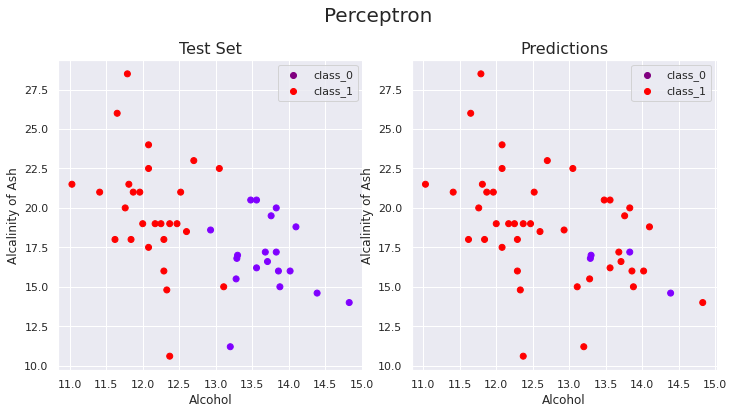

In [8]:
##### Code block for Question 5 - part 2
# print the decision boundry
# y = theta0 + theta1 * x1 + theta2 * x2 . . .
# y = bias + coefficients[0][0] * length + coefficients[0][1] * mass
# for plotting the decision boundry equally divide the x axis of the plot

# limit the plot area on x and y axises
# plot the dataset
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout()
fig.suptitle('Perceptron', fontsize=20, y=1.1)

scatter1 = ax[0].scatter(X_test_perc['alcohol'], X_test_perc['alcalinity_of_ash'], c=y_test_perc, cmap='rainbow')
ax[0].set_title('Test Set', fontsize=16)
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Alcalinity of Ash')
ax[0].scatter([], [], c=['purple'], label='class_0')
ax[0].scatter([], [], c=['red'], label='class_1')
ax[0].legend()


scatter2 = ax[1].scatter(X_test_perc['alcohol'], X_test_perc['alcalinity_of_ash'], c=y_pred_perc, cmap='rainbow')
ax[1].set_title('Predictions', fontsize=16)
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Alcalinity of Ash')
ax[1].scatter([], [], c=['purple'], label='class_0')
ax[1].scatter([], [], c=['red'], label='class_1')
ax[1].legend()


# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

The confusion matrix does match the plot on the right side.

We can clearly see how well the confusion matrix and the plot matches.
1. If we look at the number of purple points that were predicted right it is 4,
which is exactly equal to the value of TP. There were 19 purple points at first that is on the left side out of which only 4 were predicted as TP. Remaining 15 are FP which is also on the confusion matrix.
2. If we look at the red points which are of class_1, then we can see that all the red points are correctly predicted therefore FN is 0.

# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [9]:
##### Code block for Question 7
wine = datasets.load_wine()

#Converting dataset into pandas dataFrame
df2 = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df2['target'] = wine.target

#Splitting the data into training and testing set
X_dt = df2[df2.columns[:-1]]
y_dt = df2[df2.columns[-1]]
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.35, random_state = 1234)

# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [10]:
##### Code block for Question 8
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train_dt, y_train_dt)

dt_accuracy = tree.score(X_test_dt, y_test_dt)

print("The accuracy for this perceptron model is = " ,dt_accuracy)

The accuracy for this perceptron model is =  0.9365079365079365


# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [11]:
##### Code block for Question 9
y_pred_dt = tree.predict(X_test_dt)

dt_precision = metrics.precision_score(y_test_dt, y_pred_dt, average='macro')

dt_recall = metrics.recall_score(y_test_dt, y_pred_dt, average='macro')

print(metrics.classification_report(y_test_dt, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.92      0.92      0.92        26
           2       0.90      1.00      0.95        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



1. Out of all the wines the model predicted to be in class_0, 100% of the time it was right, for class_1 it was right 92% of the time, and for class_2 it was right 90% of the time.
2. Out of all the wines that were in class_0, model predicted this outcome 89% of the time, for class_1 it was predicted 92% of the time, and for clas_2 it was predicted 100% of the time.
3. This model suits well for all classes. All the classes have a f1-score very close to 1 which makes this a good model.


# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

In [12]:
##### Code block for Question 10 - part 1
cnf_matrix = metrics.confusion_matrix(y_test_dt, y_pred_dt)
print(cnf_matrix)

[[17  2  0]
 [ 0 24  2]
 [ 0  0 18]]


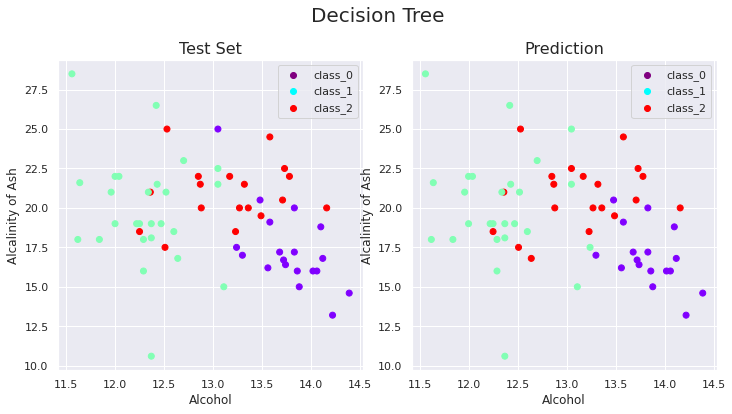

In [13]:
##### Code block for Question 10 - part 2
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout()
fig.suptitle('Decision Tree', fontsize=20, y=1.1)

scatter1 = ax[0].scatter(X_test_dt['alcohol'], X_test_dt['alcalinity_of_ash'], c=y_test_dt, cmap='rainbow')
ax[0].set_title('Test Set', fontsize=16)
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Alcalinity of Ash')
ax[0].scatter([], [], c=['purple'], label='class_0')
ax[0].scatter([], [], c=['cyan'], label='class_1')
ax[0].scatter([], [], c=['red'], label='class_2')
ax[0].legend()

scatter2 = ax[1].scatter(X_test_dt['alcohol'], X_test_dt['alcalinity_of_ash'], c=y_pred_dt, cmap='rainbow')
ax[1].set_title('Prediction', fontsize=16)
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Alcalinity of Ash')
ax[1].scatter([], [], c=['purple'], label='class_0')
ax[1].scatter([], [], c=['cyan'], label='class_1')
ax[1].scatter([], [], c=['red'], label='class_2')
ax[1].legend()

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

The plot on the right does match the confusion matrix that was generated.

1. If we look at the number of purple points which is class_0 that were predicted right it is 17, which is exactly equal to the value of TP. There were 19 purple points at first that is on the left side out of which 17 were predicted as TP. Remaining 2 are FP which is also on the confusion matrix (sum of other two rows).
2. If we look at the number of green points which is class_1 that were predicted right it is 24, which is exactly equal to the value of TP. There were 26 purple points at first that is on the left side out of which 24 were predicted as TP. Remaining 2 are FP which is also on the confusion matrix.
3. If we look at the number of red points which is class_2 that were predicted right it is 18, which is exactly equal to the value of TP. There were 18 purple points at first that is on the left side out of which all of them were predicted as TP.

In [14]:
# ##### Code block for Question 11 - part c

# X_new = wine.data[0, 3]

# def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
#     ax = ax or plt.gca()
    
#     # Plot the training points
#     ax.scatter(X_test_dt['alcohol'], X_test_dt['alcalinity_of_ash'], c=y_pred_dt, s=30, cmap=cmap,
#                clim=(y.min(), y.max()), zorder=3)
#     ax.axis('tight')
#     ax.axis('off')
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()
    
#     # fit the estimator
#     model.fit(X, y)
#     xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

#     # Create a color plot with the results
#     n_classes = len(np.unique(y))
#     contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)

#     ax.set(xlim=xlim, ylim=ylim)

# visualize_classifier(DecisionTreeClassifier(), X_new, y_dt)

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [15]:
##### Code block for Question 12
wine = datasets.load_wine()

#Converting dataset into pandas dataFrame
df3 = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df3['target'] = wine.target

#Splitting the data into training and testing set
X_lr = df3[df3.columns[:-1]]
y_lr = df3[df3.columns[-1]]
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.35, random_state = 1234)

# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [16]:
##### Code block for Question 13
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state = 1234)
log = logreg.fit(X_train_lr,y_train_lr)

# Accuracy for logistic regression
lr_accuracy = log.score(X_test_lr, y_test_lr)
print("The accuracy for this logistic regression is = " ,log.score(X_test_lr, y_test_lr))

The accuracy for this logistic regression is =  0.9523809523809523


# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [17]:
##### Code block for Question 14
y_pred_lr = log.predict(X_test_lr)

lr_precision = metrics.precision_score(y_test_lr, y_pred_lr, average='macro')

lr_recall = metrics.recall_score(y_test_lr, y_pred_lr, average='macro')

print(metrics.classification_report(y_test_lr, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.96      0.92      0.94        26
           2       0.90      1.00      0.95        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.95      0.95      0.95        63



1. Out of all the wines the model predicted to be in class_0, 100% of the time it was right, for class_1 it was right 96% of the time, and for class_2 it was right 90% of the time.
2. Out of all the wines that were in class_0, model predicted this outcome 95% of the time, for class_1 it was predicted 92% of the time, and for clas_2 it was predicted 100% of the time.
3. This model suits well for all classes. All the classes have a f1-score very close to 1 which makes this a good model.

# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

In [18]:
##### Code block for Question 15 - part 1
cnf_matrix = metrics.confusion_matrix(y_test_lr, y_pred_lr)
print(cnf_matrix)

[[18  1  0]
 [ 0 24  2]
 [ 0  0 18]]


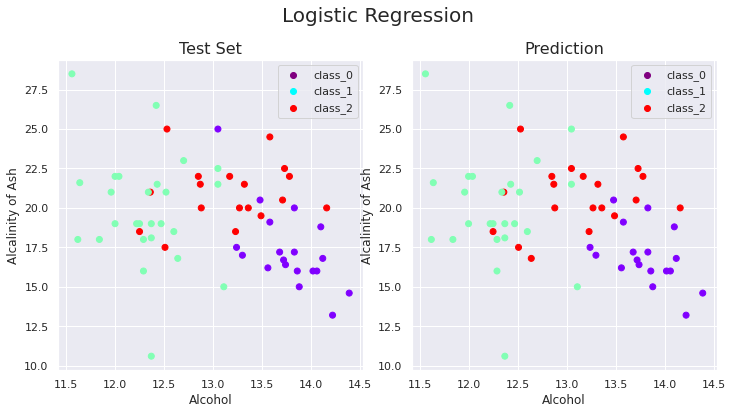

In [19]:
##### Code block for Question 15 - part 2
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout()
fig.suptitle('Logistic Regression', fontsize=20, y=1.1)

ax[0].scatter(X_test_lr['alcohol'], X_test_lr['alcalinity_of_ash'], c=y_test_lr, cmap='rainbow')
ax[0].set_title('Test Set', fontsize=16)
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Alcalinity of Ash')
ax[0].scatter([], [], c=['purple'], label='class_0')
ax[0].scatter([], [], c=['cyan'], label='class_1')
ax[0].scatter([], [], c=['red'], label='class_2')
ax[0].legend()

ax[1].scatter(X_test_lr['alcohol'], X_test_lr['alcalinity_of_ash'], c=y_pred_lr, cmap='rainbow')
ax[1].set_title('Prediction', fontsize=16)
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Alcalinity of Ash')
ax[1].scatter([], [], c=['purple'], label='class_0')
ax[1].scatter([], [], c=['cyan'], label='class_1')
ax[1].scatter([], [], c=['red'], label='class_2')
ax[1].legend()

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

The plot on the right does match the confusion matrix that was generated.

1. If we look at the number of purple points which is class_0 that were predicted right it is 18, which is exactly equal to the value of TP. There were 19 purple points at first that is on the left side out of which 17 were predicted as TP. Remaining 1 is FP which is also on the confusion matrix (sum of other two rows).
2. If we look at the number of green points which is class_1 that were predicted right it is 24, which is exactly equal to the value of on confusion matrix. There were 26 purple points at first that is on the left side out of which 24 were predicted as true. Remaining 2 are FP which is also on the confusion matrix.
3. If we look at the number of red points which is class_2 that were predicted right it is 18, which is exactly equal to the value of on the confusion matrix. There were 18 purple points at first that is on the left side out of which all of them were predicted right.

# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [20]:
##### Code block for Question 17
data = {'Accuracy': [perc_accuracy, dt_accuracy, lr_accuracy],
        'Precision': [perc_precision, dt_precision, lr_precision],
        'Recall' : [perc_recall, dt_recall, lr_recall]}
  
# Create the pandas DataFrame
df = pd.DataFrame(data, index=['Perceptron', 'Decision Tree', 'Logistic Regression'])
  
# print dataframe.
df = df.round(2)
df

,Accuracy,Precision,Recall
Perceptron,0.67,0.64,1.00
Decision Tree,0.94,0.94,0.94
Logistic Regression,0.95,0.95,0.96


It is very clear from the table that the perceptron alogorithm is a very bad choice because of the low accuracy and precision. Both the Decision Tree and Logistic Regression have high accuracy and precision but Logistic regression used One-vs-many alogorithm. Due to which we cannot fully trust it. The model ws trained with one class against other two classes. So the best model fot this data would be the Decision Tree.



# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


In [21]:
##### Code block for Graduate Student Question